## Importing the liberies

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [2]:
data_city=pd.read_csv("city_day.csv")

In [3]:
data_city.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
data_city.shape

(29531, 16)

In [5]:
data_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [6]:
data_city.nunique()

City             26
Date           2009
PM2.5         11716
PM10          12571
NO             5776
NO2            7404
NOx            8156
NH3            5922
CO             1779
SO2            4761
O3             7699
Benzene        1873
Toluene        3608
Xylene         1561
AQI             829
AQI_Bucket        6
dtype: int64

In [7]:
data_city.City.unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [8]:
data_city.City.value_counts()

City
Ahmedabad             2009
Delhi                 2009
Mumbai                2009
Bengaluru             2009
Lucknow               2009
Chennai               2009
Hyderabad             2006
Patna                 1858
Gurugram              1679
Visakhapatnam         1462
Amritsar              1221
Jorapokhar            1169
Jaipur                1114
Thiruvananthapuram    1112
Amaravati              951
Brajrajnagar           938
Talcher                925
Kolkata                814
Guwahati               502
Coimbatore             386
Shillong               310
Chandigarh             304
Bhopal                 289
Ernakulam              162
Kochi                  162
Aizawl                 113
Name: count, dtype: int64

In [9]:
data_city.dtypes

City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

In [10]:
data_city.AQI_Bucket.unique()

array([nan, 'Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory',
       'Good'], dtype=object)

In [11]:
data_city.AQI_Bucket.value_counts()

AQI_Bucket
Moderate        8829
Satisfactory    8224
Poor            2781
Very Poor       2337
Good            1341
Severe          1338
Name: count, dtype: int64

## Handling Null Values

In [12]:
data_city.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [13]:
data_city.duplicated().sum()

0

## Data Analysis And Visualization

In [14]:
data_city.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [15]:
data_city['Date'] = pd.to_datetime(data_city['Date'], infer_datetime_format=True)
data_city['Year'] = pd.DatetimeIndex(data_city['Date']).year
data_city['Month'] = pd.DatetimeIndex(data_city['Date']).month

data_city.drop('Date',axis=1,inplace=True)

In [16]:
data_city.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month
0,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,2015,1
1,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,2015,1
2,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,2015,1
3,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,2015,1
4,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,2015,1


<Axes: title={'center': 'Year Wise Reading'}, xlabel='Year', ylabel='count'>

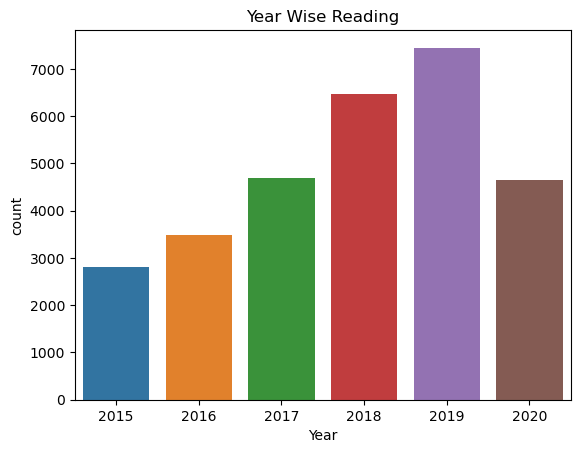

In [17]:
plt.title("Year Wise Reading")
sns.countplot(x=data_city.Year)

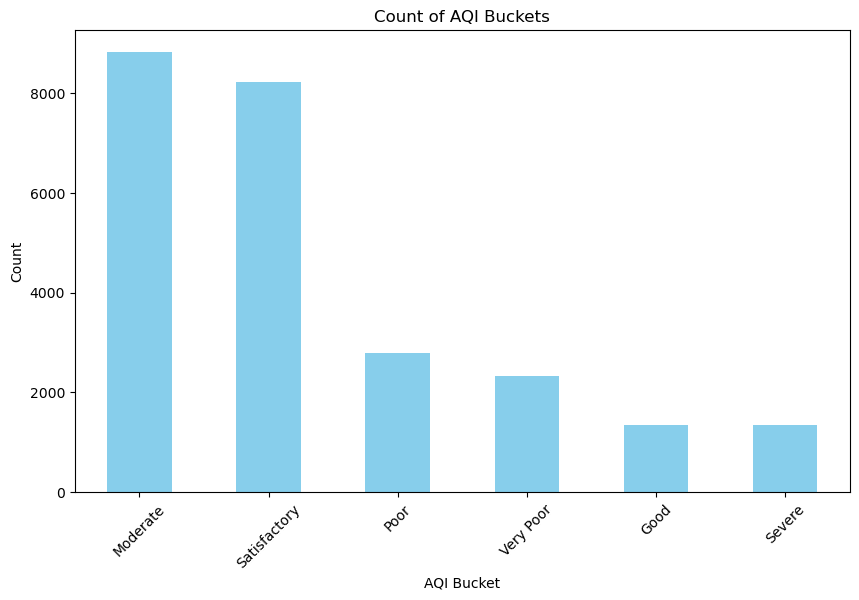

In [18]:
aqi_buckets_count = data_city['AQI_Bucket'].value_counts()
plt.figure(figsize=(10, 6))
aqi_buckets_count.plot(kind='bar', color='skyblue')
plt.title('Count of AQI Buckets')
plt.xlabel('AQI Bucket')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Year', ylabel='AQI'>

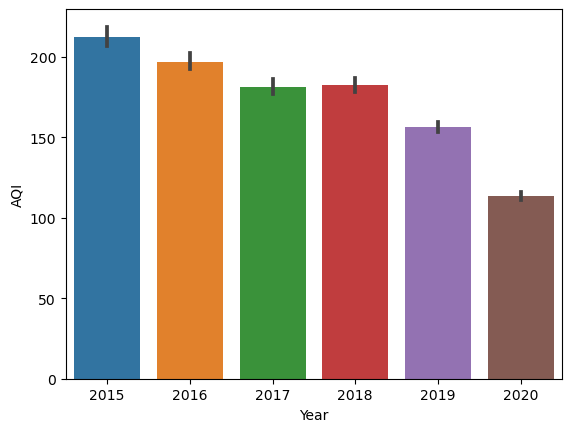

In [19]:
sns.barplot(x=data_city.Year,y=data_city.AQI)

Text(0.5, 1.0, 'city vs AQI')

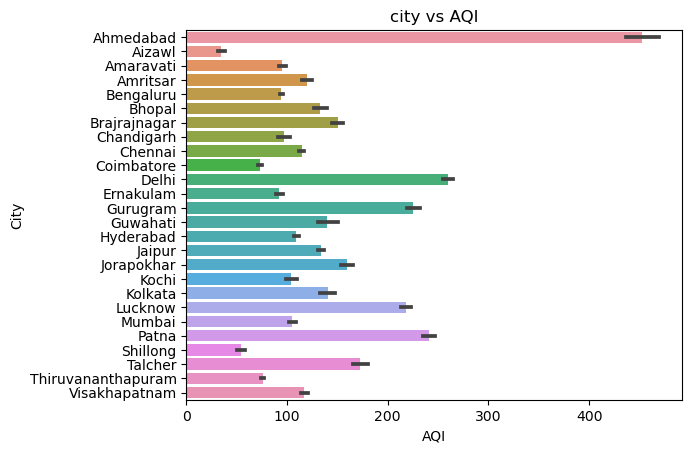

In [20]:
sns.barplot(y=data_city.City,x=data_city.AQI)
plt.title("city vs AQI")

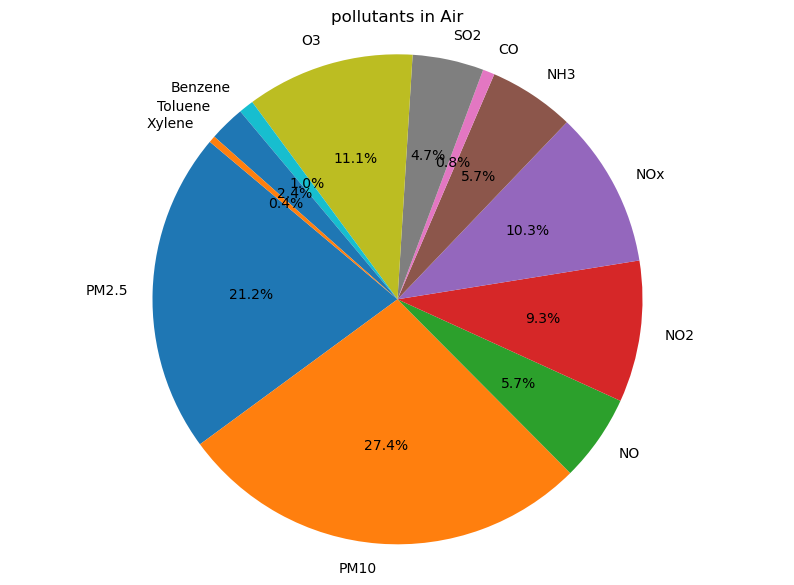

In [21]:
parameter = data_city[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']]
plt.figure(figsize=(10, 7))
plt.pie(parameter.sum(), labels=parameter.columns, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title("pollutants in Air")
plt.show()

<Axes: xlabel='AQI', ylabel='Count'>

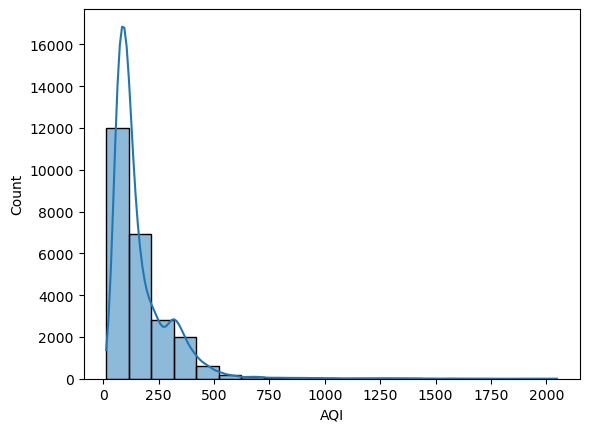

In [22]:
sns.histplot(x=data_city['AQI'],bins=20,kde=True)

In [23]:

data_city.drop('AQI_Bucket',inplace=True,axis=1)


In [24]:
temp=data_city[data_city['AQI']>500]
temp.shape

(543, 16)

In [25]:
temp=data_city[data_city['AQI']>500]

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def handle_outliers(df):
    # Plot boxplots before handling outliers
    plt.figure(figsize=(15, 10))
    df.boxplot(rot=90)
    plt.title('Boxplot Before Handling Outliers')
    plt.show()
    
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Cap the outliers
            df[column] = np.where(df[column] < lower_bound, lower_bound,
                                  np.where(df[column] > upper_bound, upper_bound, df[column]))
    
    # Plot boxplots after handling outliers
    plt.figure(figsize=(15, 10))
    df.boxplot(rot=90)
    plt.title('Boxplot After Handling Outliers')
    plt.show()
    
    return df



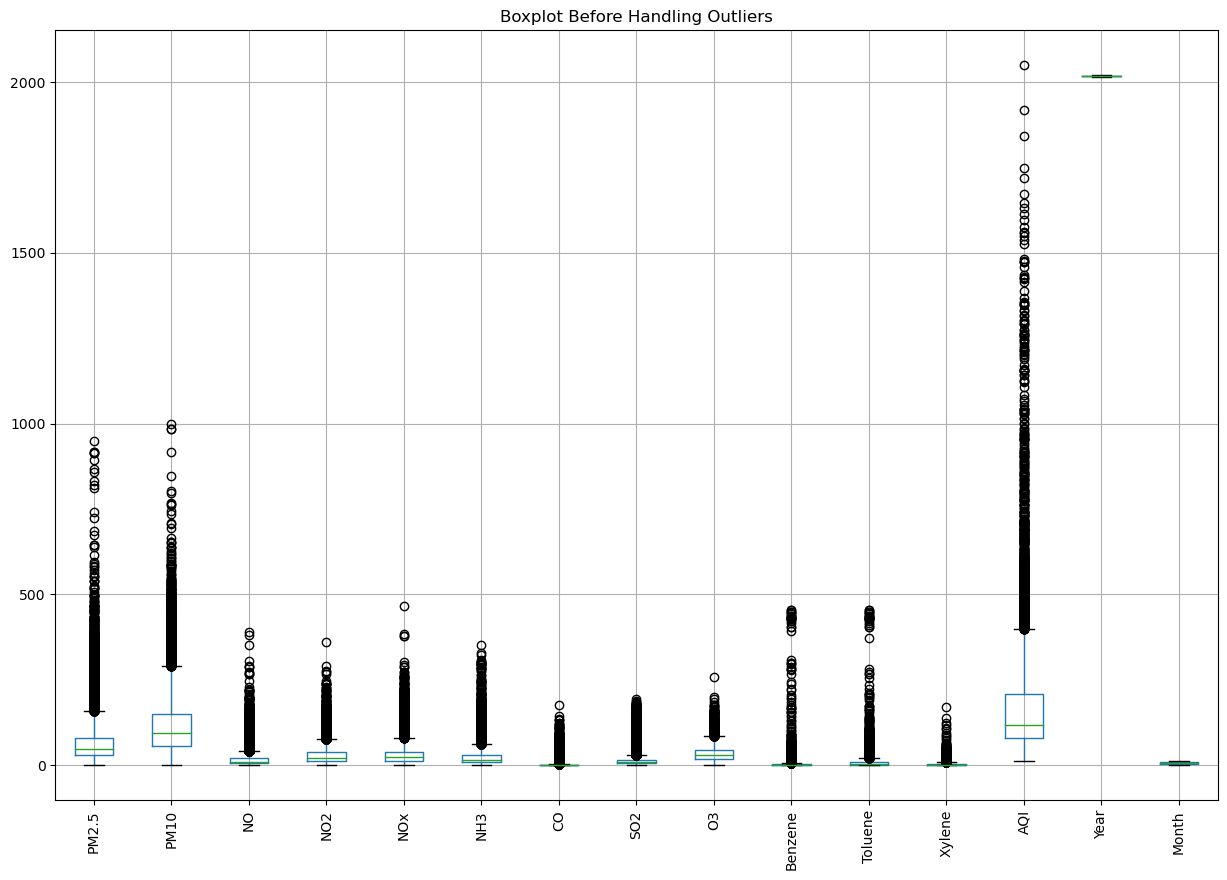

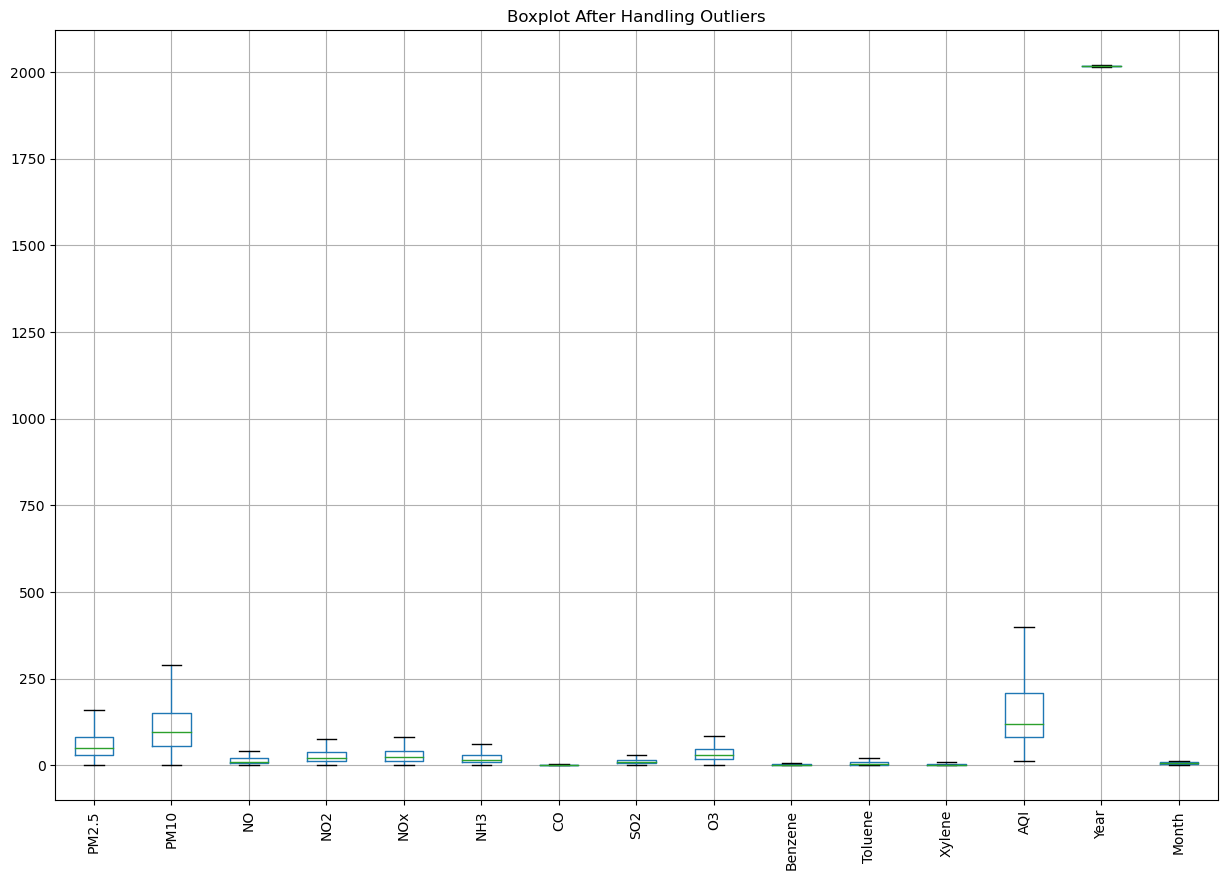

In [27]:
data_city = handle_outliers(data_city)

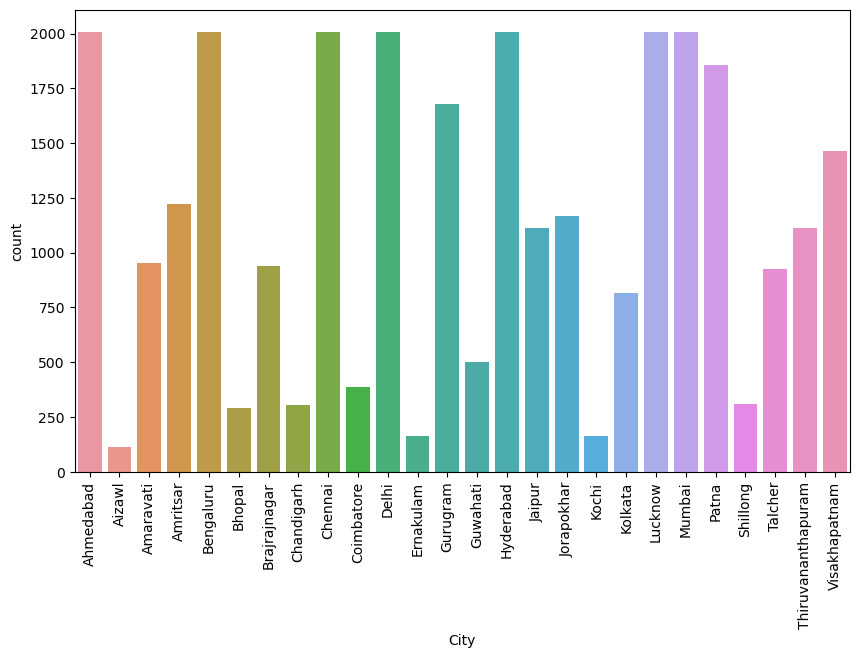

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.countplot(x=data_city['City'])
plt.xticks(rotation='vertical')  
plt.show()

In [29]:
null_cols=data_city.columns[data_city.isna().any()].tolist()

In [30]:
null_cols

['PM2.5',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'O3',
 'Benzene',
 'Toluene',
 'Xylene',
 'AQI']

In [31]:
from sklearn.impute import KNNImputer

In [32]:
imputer=KNNImputer(n_neighbors=2)


In [33]:
data_city[null_cols]=imputer.fit_transform(data_city[null_cols])

In [34]:
data_city[null_cols]

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,34.515,154.750,0.92,18.22,17.15,8.975,0.92,27.640,85.635,0.00,0.02,0.00,93.00
1,25.830,226.235,0.97,15.69,16.46,9.095,0.97,24.550,34.060,3.68,5.50,3.77,125.50
2,36.205,72.125,17.40,19.30,29.70,6.880,2.86,29.070,30.700,6.80,16.40,2.25,238.00
3,25.830,226.235,1.70,18.48,17.97,9.085,1.70,18.590,36.080,4.43,10.14,1.00,177.50
4,54.440,72.125,22.10,21.42,37.76,7.915,2.86,29.545,39.310,7.01,18.89,2.78,254.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.020,50.940,7.68,25.06,19.54,12.470,0.47,8.550,23.300,2.24,12.07,0.73,41.00
29527,24.380,74.090,3.42,26.06,16.53,11.990,0.52,12.720,30.140,0.74,2.21,0.38,70.00
29528,22.910,65.730,3.45,29.53,18.33,10.710,0.48,8.420,30.960,0.01,0.01,0.00,68.00
29529,16.640,49.970,4.05,29.26,18.80,10.030,0.52,9.840,28.300,0.00,0.00,0.00,54.00


In [35]:
data_city.isna().sum()

City       0
PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
Year       0
Month      0
dtype: int64

In [36]:
data_city

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Year,Month
0,Ahmedabad,34.515,154.750,0.92,18.22,17.15,8.975,0.92,27.640,85.635,0.00,0.02,0.00,93.00,2015.0,1.0
1,Ahmedabad,25.830,226.235,0.97,15.69,16.46,9.095,0.97,24.550,34.060,3.68,5.50,3.77,125.50,2015.0,1.0
2,Ahmedabad,36.205,72.125,17.40,19.30,29.70,6.880,2.86,29.070,30.700,6.80,16.40,2.25,238.00,2015.0,1.0
3,Ahmedabad,25.830,226.235,1.70,18.48,17.97,9.085,1.70,18.590,36.080,4.43,10.14,1.00,177.50,2015.0,1.0
4,Ahmedabad,54.440,72.125,22.10,21.42,37.76,7.915,2.86,29.545,39.310,7.01,18.89,2.78,254.25,2015.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,15.020,50.940,7.68,25.06,19.54,12.470,0.47,8.550,23.300,2.24,12.07,0.73,41.00,2020.0,6.0
29527,Visakhapatnam,24.380,74.090,3.42,26.06,16.53,11.990,0.52,12.720,30.140,0.74,2.21,0.38,70.00,2020.0,6.0
29528,Visakhapatnam,22.910,65.730,3.45,29.53,18.33,10.710,0.48,8.420,30.960,0.01,0.01,0.00,68.00,2020.0,6.0
29529,Visakhapatnam,16.640,49.970,4.05,29.26,18.80,10.030,0.52,9.840,28.300,0.00,0.00,0.00,54.00,2020.0,6.0


In [37]:
numerical_cols=pd.DataFrame(data_city.select_dtypes(exclude='object'))

In [38]:
numerical_cols

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Year,Month
0,34.515,154.750,0.92,18.22,17.15,8.975,0.92,27.640,85.635,0.00,0.02,0.00,93.00,2015.0,1.0
1,25.830,226.235,0.97,15.69,16.46,9.095,0.97,24.550,34.060,3.68,5.50,3.77,125.50,2015.0,1.0
2,36.205,72.125,17.40,19.30,29.70,6.880,2.86,29.070,30.700,6.80,16.40,2.25,238.00,2015.0,1.0
3,25.830,226.235,1.70,18.48,17.97,9.085,1.70,18.590,36.080,4.43,10.14,1.00,177.50,2015.0,1.0
4,54.440,72.125,22.10,21.42,37.76,7.915,2.86,29.545,39.310,7.01,18.89,2.78,254.25,2015.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.020,50.940,7.68,25.06,19.54,12.470,0.47,8.550,23.300,2.24,12.07,0.73,41.00,2020.0,6.0
29527,24.380,74.090,3.42,26.06,16.53,11.990,0.52,12.720,30.140,0.74,2.21,0.38,70.00,2020.0,6.0
29528,22.910,65.730,3.45,29.53,18.33,10.710,0.48,8.420,30.960,0.01,0.01,0.00,68.00,2020.0,6.0
29529,16.640,49.970,4.05,29.26,18.80,10.030,0.52,9.840,28.300,0.00,0.00,0.00,54.00,2020.0,6.0


In [39]:
corr=numerical_cols.corr()

In [40]:
corr

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Year,Month
PM2.5,1.000000,0.663063,0.458638,0.449552,0.390462,0.245167,0.379025,0.242864,0.226649,0.245088,0.275333,0.187222,0.828086,-0.169946,0.004854
PM10,0.663063,1.000000,0.483166,0.442827,0.456178,0.289825,0.267859,0.276507,0.227497,0.266890,0.252179,0.133385,0.623724,-0.035046,-0.030644
NO,0.458638,0.483166,1.000000,0.511615,0.714169,0.253061,0.367046,0.330391,-0.018707,0.281966,0.247507,0.200318,0.498383,-0.001998,0.025691
NO2,0.449552,0.442827,0.511615,1.000000,0.558418,0.298583,0.304951,0.313781,0.310012,0.397798,0.500851,0.323632,0.506496,-0.059378,0.031208
NOx,0.390462,0.456178,0.714169,0.558418,1.000000,0.214350,0.334084,0.314813,0.086039,0.287985,0.266214,0.179986,0.441036,0.029818,0.016093
NH3,0.245167,0.289825,0.253061,0.298583,0.214350,1.000000,0.126415,-0.002262,0.102821,0.167843,0.147500,-0.020910,0.194749,-0.068457,0.003391
CO,0.379025,0.267859,0.367046,0.304951,0.334084,0.126415,1.000000,0.346966,0.086300,0.215024,0.297123,0.173483,0.576703,-0.157542,0.004761
SO2,0.242864,0.276507,0.330391,0.313781,0.314813,-0.002262,0.346966,1.000000,0.207166,0.185633,0.306975,0.266725,0.391109,0.097368,-0.033947
O3,0.226649,0.227497,-0.018707,0.310012,0.086039,0.102821,0.086300,0.207166,1.000000,0.129897,0.229792,0.120869,0.236636,0.024858,-0.084281
Benzene,0.245088,0.266890,0.281966,0.397798,0.287985,0.167843,0.215024,0.185633,0.129897,1.000000,0.669587,0.577137,0.305814,0.048884,0.039967


<Axes: >

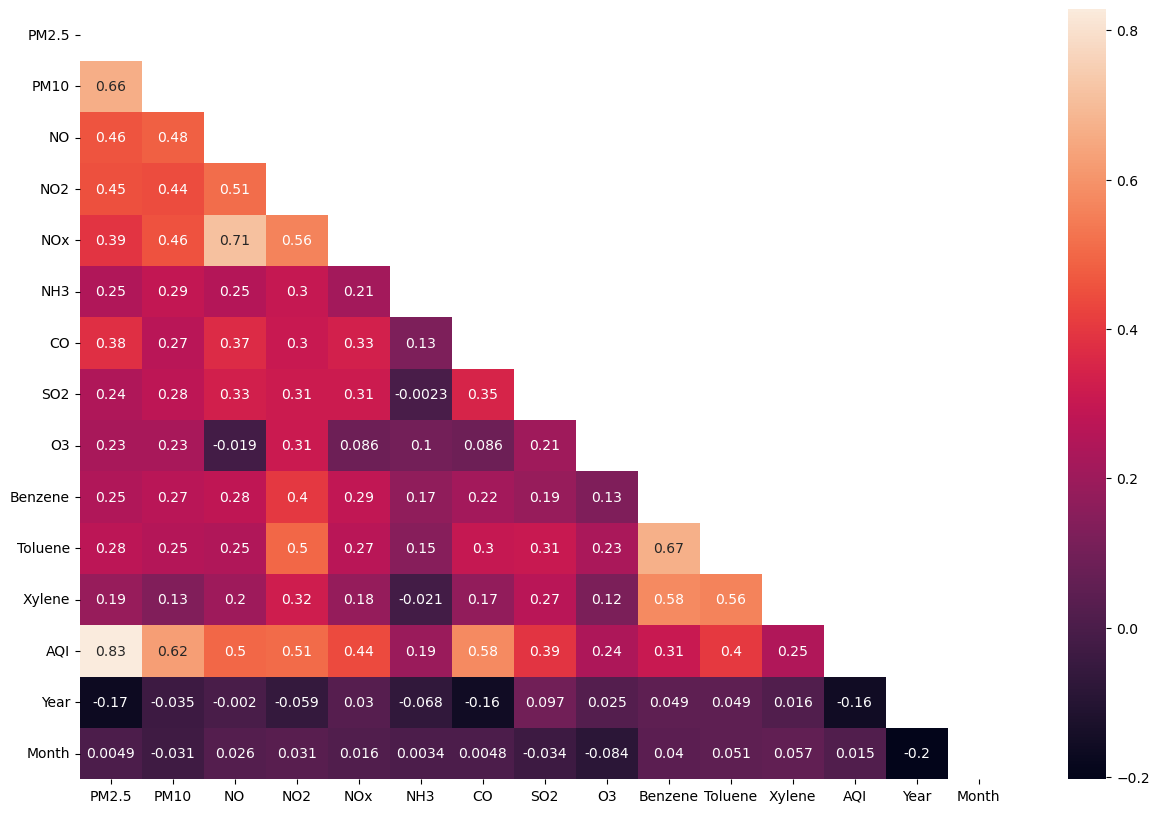

In [41]:
plt.figure(figsize=(15,10))
mask=np.triu(corr)
sns.heatmap(corr,annot=True,mask=mask)

## Handling Categorical Values

In [42]:
encoded=LabelEncoder()

In [43]:
data_city['City']=encoded.fit_transform(data_city['City'])

In [44]:
import joblib

In [45]:
joblib.dump(encoded,"label_values")
joblib.dump(encoded, 'label_encoder.pkl')

['label_encoder.pkl']

In [46]:
data_city['City'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [47]:
data_city.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'Year', 'Month'],
      dtype='object')

In [48]:
X=data_city.drop('AQI',axis=1)
y=data_city['AQI']

In [49]:
X

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,Year,Month
0,0,34.515,154.750,0.92,18.22,17.15,8.975,0.92,27.640,85.635,0.00,0.02,0.00,2015.0,1.0
1,0,25.830,226.235,0.97,15.69,16.46,9.095,0.97,24.550,34.060,3.68,5.50,3.77,2015.0,1.0
2,0,36.205,72.125,17.40,19.30,29.70,6.880,2.86,29.070,30.700,6.80,16.40,2.25,2015.0,1.0
3,0,25.830,226.235,1.70,18.48,17.97,9.085,1.70,18.590,36.080,4.43,10.14,1.00,2015.0,1.0
4,0,54.440,72.125,22.10,21.42,37.76,7.915,2.86,29.545,39.310,7.01,18.89,2.78,2015.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,25,15.020,50.940,7.68,25.06,19.54,12.470,0.47,8.550,23.300,2.24,12.07,0.73,2020.0,6.0
29527,25,24.380,74.090,3.42,26.06,16.53,11.990,0.52,12.720,30.140,0.74,2.21,0.38,2020.0,6.0
29528,25,22.910,65.730,3.45,29.53,18.33,10.710,0.48,8.420,30.960,0.01,0.01,0.00,2020.0,6.0
29529,25,16.640,49.970,4.05,29.26,18.80,10.030,0.52,9.840,28.300,0.00,0.00,0.00,2020.0,6.0


In [50]:
y

0         93.00
1        125.50
2        238.00
3        177.50
4        254.25
          ...  
29526     41.00
29527     70.00
29528     68.00
29529     54.00
29530     50.00
Name: AQI, Length: 29531, dtype: float64

## Splitting Data Into Train, Validation And Test Sets

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
X_train.shape,X_test.shape

((20671, 15), (8860, 15))

In [53]:
y_train.shape,y_test.shape

((20671,), (8860,))

In [54]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)


In [55]:
X_train.shape,X_test.shape,X_val.shape,y_val.shape

((14469, 15), (8860, 15), (6202, 15), (6202,))

## Model Building 

In [56]:
from sklearn.tree import DecisionTreeRegressor

In [57]:
dt=DecisionTreeRegressor(random_state=42)

In [58]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [59]:
print("R2 Score :{}".format(dt.score(X_test,y_test)))

R2 Score :0.8070208658711717


In [60]:
from sklearn.ensemble import RandomForestRegressor


rf_regressor = RandomForestRegressor(random_state=42,n_estimators=20)
rf_regressor.fit(X_train, y_train)


RandomForestRegressor(n_estimators=20, random_state=42)

In [61]:
print("R2 Score :{}".format(rf_regressor.score(X_test,y_test)))

R2 Score :0.894994541209092


In [62]:
from sklearn.ensemble import ExtraTreesRegressor

In [63]:
et_regressor = ExtraTreesRegressor(n_estimators=100, max_depth=10, random_state=23)

In [64]:
et_regressor.fit(X_train, y_train)

ExtraTreesRegressor(max_depth=10, random_state=23)

In [65]:
print("R2 Score :{}".format(et_regressor.score(X_test,y_test)))

R2 Score :0.8989213134566164


In [66]:
import xgboost as xgb

In [67]:
xgb_regressor = xgb.XGBRegressor(objective='reg:linear', n_estimators=10, seed=123)

In [68]:
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [69]:
print("R2 Score :{}".format(xgb_regressor.score(X_test,y_test)))

R2 Score :0.8912741790690011


## Comparing Performance Of Various Models

In [70]:
model_dict = {}


In [71]:
model_dict['Decision Tree Regressor'] = DecisionTreeRegressor(random_state=42)
model_dict['Random Forest Regressor'] = RandomForestRegressor(random_state=42)
model_dict['Extra Trees Regressor'] = ExtraTreesRegressor(random_state=42)
model_dict['XGB Regressor'] = xgb.XGBRegressor(random_state=42)


In [72]:


def model_test(X_train, X_test, y_train, y_test, model, model_name):
    model.fit(X_train, y_train)
    print('----------------------------{}----------------------------'.format(model_name))
    print('R2 Score is : {}'.format(model.score(X_test, y_test)))
    print()


In [73]:
print("===========VALIDATION DATA===========")
print()
for model_name, model in model_dict.items():
    model_test(X_train, X_val, y_train, y_val, model, model_name)

print("===========TEST DATA===========")
print()
for model_name, model in model_dict.items():
    model_test(X_train, X_test, y_train, y_test, model, model_name)


===========VALIDATION DATA===========

----------------------------Decision Tree Regressor----------------------------
R2 Score is : 0.7944373542615825

----------------------------Random Forest Regressor----------------------------
R2 Score is : 0.888464414152618

----------------------------Extra Trees Regressor----------------------------
R2 Score is : 0.8937335681153357

----------------------------XGB Regressor----------------------------
R2 Score is : 0.8882387129278272

===========TEST DATA===========

----------------------------Decision Tree Regressor----------------------------
R2 Score is : 0.8070208658711717

----------------------------Random Forest Regressor----------------------------
R2 Score is : 0.8985391262232978

----------------------------Extra Trees Regressor----------------------------
R2 Score is : 0.9069926057864193

----------------------------XGB Regressor----------------------------
R2 Score is : 0.8966943190225697



In [74]:
model = ExtraTreesRegressor(n_estimators=100, random_state=42)

In [75]:
model.fit(X_train,y_train)

ExtraTreesRegressor(random_state=42)

In [76]:
print("Val R2 score:{},test R2 score:{}".format(model.score(X_val,y_val),model.score(X_test,y_test)))

Val R2 score:0.8937335681153357,test R2 score:0.9069926057864193


In [77]:
y_pred=model.predict(X_test)

## Evaluating Model Performance

Text(0.5, 1.0, 'Prediction Error')

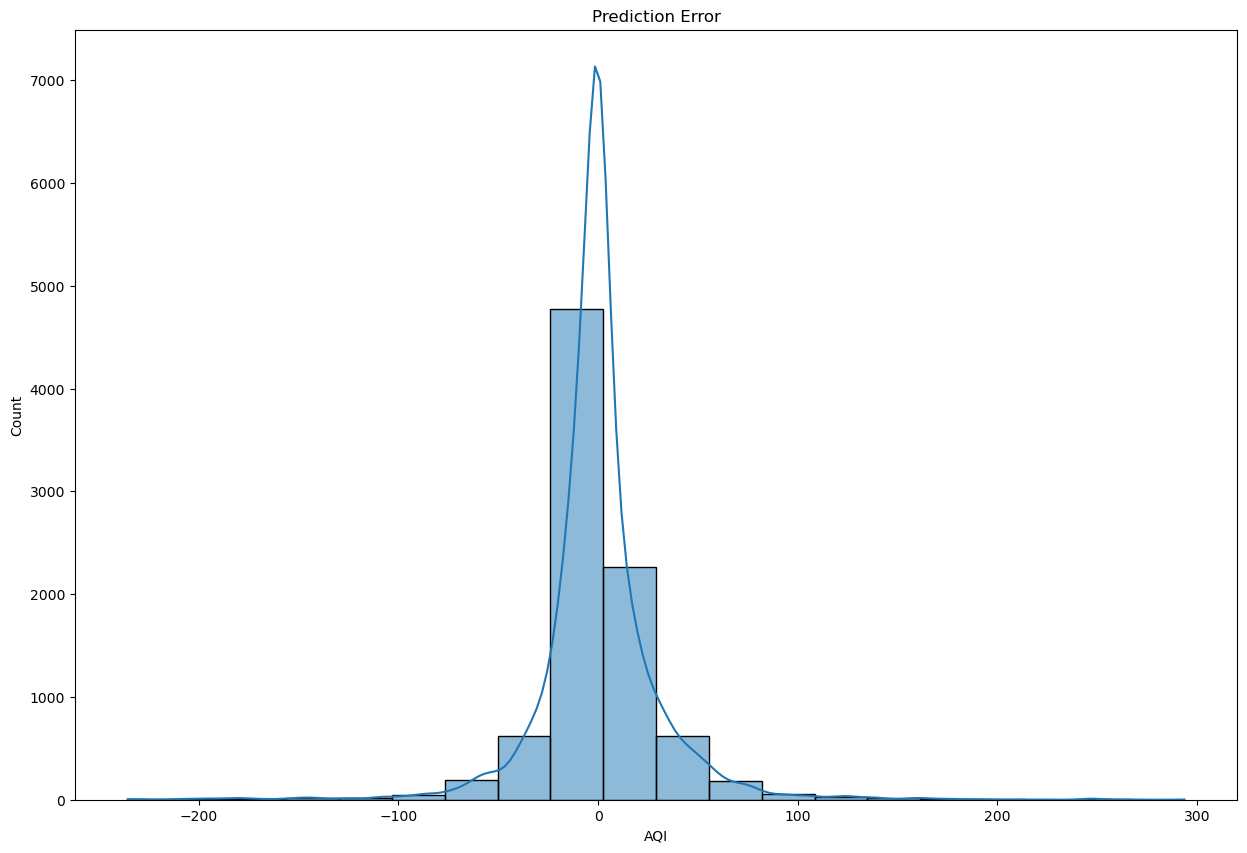

In [78]:
plt.figure(figsize=(15,10))
sns.histplot(y_test-y_pred,bins=20,kde=True)
plt.title("Prediction Error")

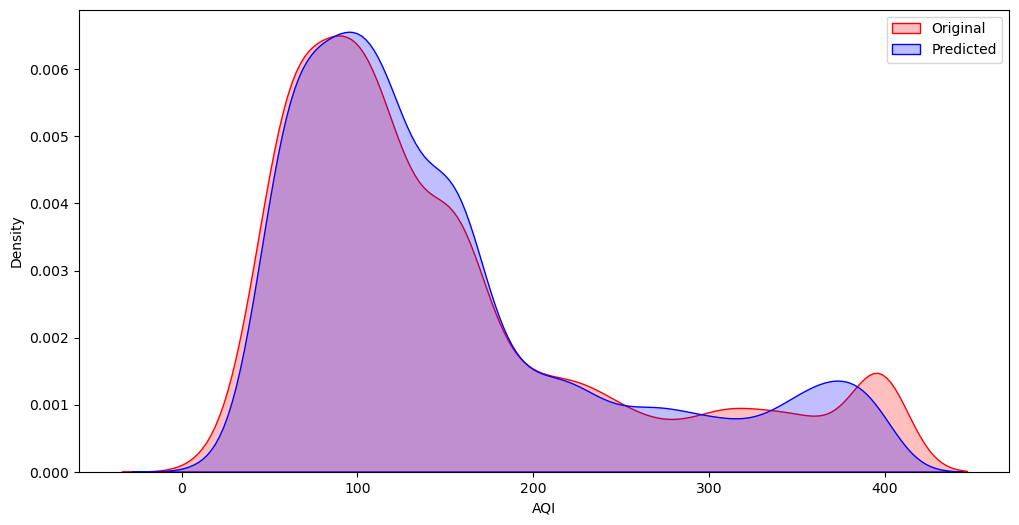

In [79]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=y_test, color='red', label='Original', fill=True, ax=ax)
sns.kdeplot(data=y_pred, color='blue', label='Predicted', fill=True, ax=ax)
plt.legend()
plt.xlabel('AQI')
plt.ylabel('Density')
plt.show()

## Saving The Final Model

In [80]:
import pickle as pkl

In [81]:
pkl.dump(model,open("model.pkl","wb"))

In [82]:


import joblib

# Load the model
model = joblib.load('model.pkl')

# Save the model to a new file with a smaller size limit
joblib.dump(model, 'model_small.pkl', compress=9)


['model_small.pkl']